In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from Lux.model.conf import *


In [6]:
model_df = pd.read_pickle(f"results/Model_vars{LOG_NAME_SUFFIX}.pkl")
model_df = model_df.rolling(5, min_periods=1).mean()

model_df.head()

,tech_optimists,tech_pessimists,price,nf,technical_fraction,slope
0,9.00,10.000000,10.000000,181.000000,0.095000,0.000000
1,9.00,10.000000,10.005000,181.000000,0.095000,0.000000
2,9.00,9.666667,10.003333,181.333333,0.093333,0.083333
3,8.75,9.500000,10.000000,181.750000,0.091250,0.062500
4,8.60,9.400000,9.998000,182.000000,0.090000,0.016667


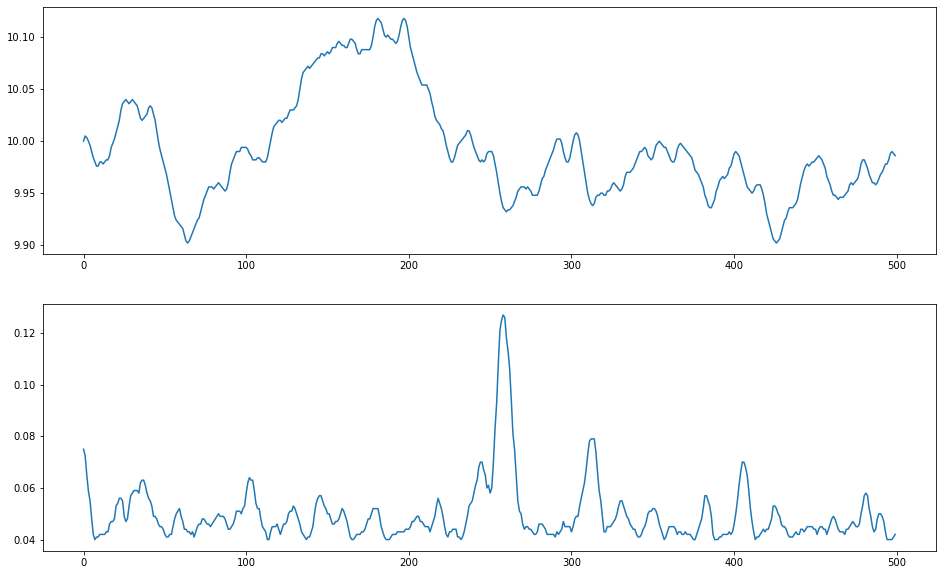

In [ ]:
fig , ax = plt.subplots(2,1, figsize=(16, 10))

ax[0].plot(model_df.price)

ax[1].plot(model_df.technical_fraction)


In [ ]:
edt = (model_df.tech_optimists - model_df.tech_pessimists) * tc  # excess technical demand
edf = model_df.nf * gamma * (pf - model_df.price)

model_df["edt"] = edt
model_df["edf"] = edf
model_df["ed"]  = edt + edf

model_df.head()

,tech_optimists,tech_pessimists,price,nf,technical_fraction,slope,edt,edf,ed
0,6.0,9.00,10.000000,185.00,0.07500,0.000000,-0.060,0.000000,-0.060000
1,6.5,8.00,10.005000,185.50,0.07250,0.000000,-0.030,-0.009275,-0.039275
2,6.0,7.00,10.003333,187.00,0.06500,0.083333,-0.020,-0.006233,-0.026233
3,5.5,6.25,10.000000,188.25,0.05875,0.062500,-0.015,0.000000,-0.015000
4,5.2,5.80,9.996000,189.00,0.05500,0.016667,-0.012,0.007560,-0.004440


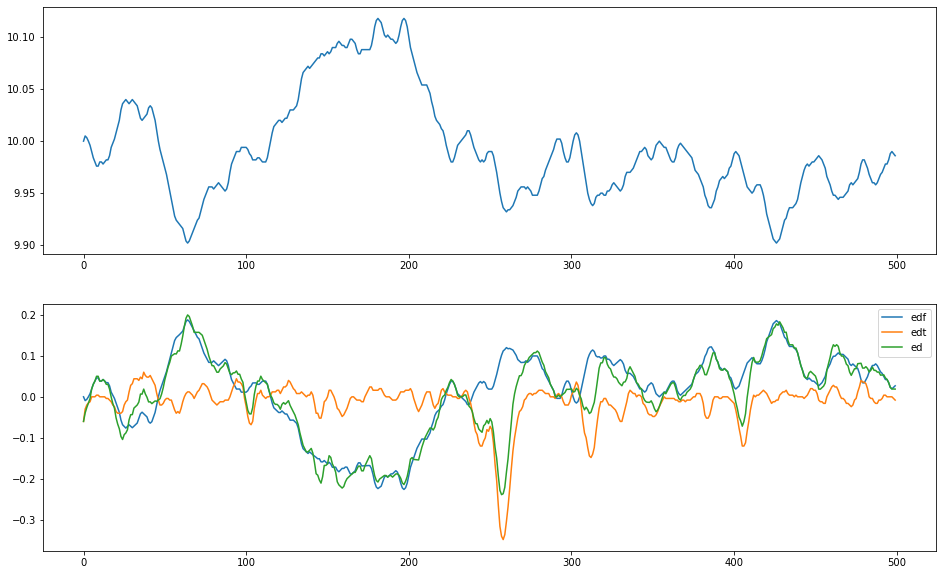

In [ ]:
fig , ax = plt.subplots(2,1, figsize=(16, 10))

ax[0].plot(model_df.price)
ax[1].plot(model_df.edf, label="edf")
ax[1].plot(model_df.edt, label="edt")
ax[1].plot(model_df.ed, label="ed")
ax[1].legend()

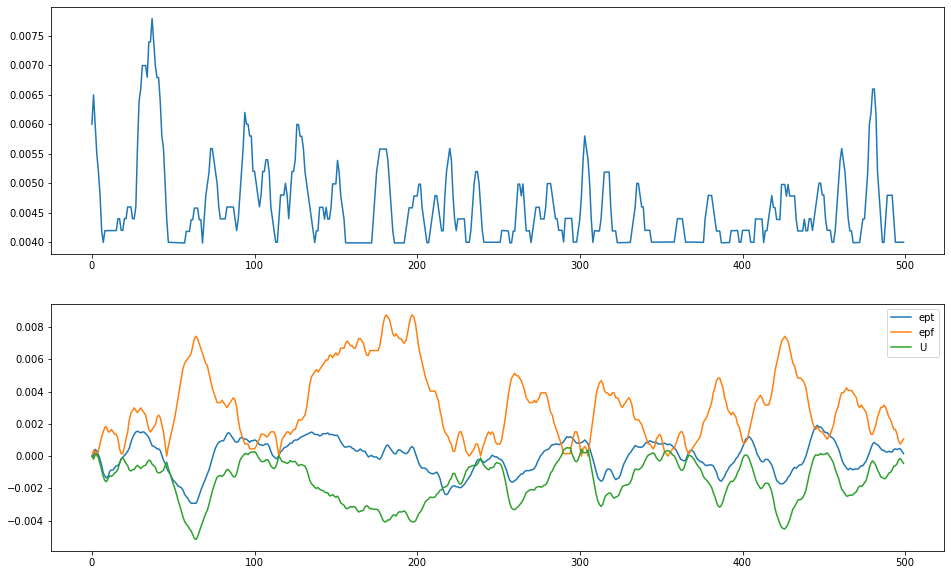

In [ ]:
ept = (r + model_df.slope / v2) / model_df.price - R
epf = s * abs((model_df.price - pf) / model_df.price)

U = a3 * (ept - epf)
p_transition = v2 * model_df.tech_optimists / N * np.exp(U) * DT

fig, ax = plt.subplots(2, 1, figsize=(16,10))
ax[0].plot(p_transition)
ax[1].plot(ept, label="ept")
ax[1].plot(epf, label="epf")
ax[1].plot(U, label="U")
ax[1].legend()